In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd

import fair
from matplotlib import pyplot as plt
from fair.forward2 import fair_scm
from fair.forward import fair_scm
from fair.forward3 import fair_scm

In [2]:
SSPs = pd.read_csv("/Users/michelledvorak/Downloads/rcmip-emissions-annual-means-v4-0-0.csv")

In [3]:
SSPs_scenario = SSPs['Scenario'].str.contains('ssp')
SSPs_only = SSPs[SSPs_scenario]

SSPs_region = SSPs_only['Region'].str.contains('R5.2')
SSPs_world = SSPs_only[~SSPs_region]

# SSPs_world

In [4]:
sums_only = SSPs_world.loc[:,'Variable'].str.contains('MAGICC')
SSPs = SSPs_world[~sums_only]

In [5]:
del SSPs['Region']
del SSPs['Activity_Id']
del SSPs['Mip_Era']


In [6]:
SSP_119 = SSPs.loc[:,'Scenario'].str.contains('ssp119')
SSP_119 = SSPs[SSP_119]

SSP_126 = SSPs.loc[:,'Scenario'].str.contains('ssp126')
SSP_126 = SSPs[SSP_126]

SSP_245 = SSPs.loc[:,'Scenario'].str.contains('ssp245')
SSP_245 = SSPs[SSP_245]

SSP_370 = SSPs.loc[:,'Scenario'].str.contains('ssp370')
SSP_370 = SSPs[SSP_370]

SSP_434 = SSPs.loc[:,'Scenario'].str.contains('ssp434')
SSP_434 = SSPs[SSP_434]

SSP_460 = SSPs.loc[:,'Scenario'].str.contains('ssp460')
SSP_460 = SSPs[SSP_460]

SSP_534_os = SSPs.loc[:,'Scenario'].str.contains('ssp534-over')
SSP_534_os = SSPs[SSP_534_os]

SSP_585 = SSPs.loc[:,'Scenario'].str.contains('ssp585')
SSP_585 = SSPs[SSP_585]

In [7]:
# SSP_119

In [8]:
model_list = [SSP_119, SSP_126, SSP_245, SSP_370, SSP_434, SSP_460, SSP_534_os, SSP_585]
empty_list = []
empty_list_2 = []

for model in model_list:
    model = model.groupby('Variable').mean()
    model = model.T
    model.loc[:,'Year'] = model.index
    model.loc[:,'Year'] = model.loc[:,'Year'].astype(int)
#     model.loc[:,'Year2'] = model.loc[:,'Year']
    model.drop(model[model.Year < 1765].index, inplace=True)
#     model.drop(model[model.Year > 2160].index, inplace=True)
#     model.loc[:,'Year'] = pd.to_datetime(model['Year'], format='%Y')
    model.index = model['Year']
#     model = model.resample('Y').mean()
    model = model.interpolate(method ='linear', limit_direction ='forward')
    empty_list.append(model)
    
    for col_name in model.columns:
        empty_list_2.append(col_name)
    

In [9]:
SSP_119 = empty_list[0]
SSP_126 = empty_list[1]
SSP_245 = empty_list[2]
SSP_370 = empty_list[3]
SSP_434 = empty_list[4]
SSP_460 = empty_list[5]
SSP_534_os = empty_list[6]
SSP_585 = empty_list[7]

# type = DataFrame

In [10]:
empty_list_2[0:51]

['Emissions|BC',
 'Emissions|CH4',
 'Emissions|CO',
 'Emissions|CO2',
 'Emissions|F-Gases|HFC|HFC125',
 'Emissions|F-Gases|HFC|HFC134a',
 'Emissions|F-Gases|HFC|HFC143a',
 'Emissions|F-Gases|HFC|HFC152a',
 'Emissions|F-Gases|HFC|HFC227ea',
 'Emissions|F-Gases|HFC|HFC23',
 'Emissions|F-Gases|HFC|HFC236fa',
 'Emissions|F-Gases|HFC|HFC245fa',
 'Emissions|F-Gases|HFC|HFC32',
 'Emissions|F-Gases|HFC|HFC365mfc',
 'Emissions|F-Gases|HFC|HFC4310mee',
 'Emissions|F-Gases|NF3',
 'Emissions|F-Gases|PFC|C2F6',
 'Emissions|F-Gases|PFC|C3F8',
 'Emissions|F-Gases|PFC|C4F10',
 'Emissions|F-Gases|PFC|C5F12',
 'Emissions|F-Gases|PFC|C6F14',
 'Emissions|F-Gases|PFC|C7F16',
 'Emissions|F-Gases|PFC|C8F18',
 'Emissions|F-Gases|PFC|CF4',
 'Emissions|F-Gases|PFC|cC4F8',
 'Emissions|F-Gases|SF6',
 'Emissions|F-Gases|SO2F2',
 'Emissions|Montreal Gases|CCl4',
 'Emissions|Montreal Gases|CFC|CFC11',
 'Emissions|Montreal Gases|CFC|CFC113',
 'Emissions|Montreal Gases|CFC|CFC114',
 'Emissions|Montreal Gases|CFC|CFC11

In [11]:
nt = len(SSP_119)
nt

736

In [12]:
emissions_119 = np.zeros((nt,40))
emissions_126 = np.zeros((nt,40))
emissions_245 = np.zeros((nt,40))
emissions_370 = np.zeros((nt,40))
emissions_434 = np.zeros((nt,40))
emissions_460 = np.zeros((nt,40))
emissions_534_os = np.zeros((nt,40))
emissions_585 = np.zeros((nt,40))

array_list = [emissions_119, 
              emissions_126, 
              emissions_245, 
              emissions_370, 
              emissions_434, 
              emissions_460, 
              emissions_534_os, 
              emissions_585]

SSP_list = [SSP_119, 
            SSP_126, 
            SSP_245, 
            SSP_370, 
            SSP_434, 
            SSP_460, 
            SSP_534_os, 
            SSP_585]

In [13]:
empty_list = []

for array, SSP in zip(array_list, SSP_list):
    array[:,0] = SSP['Year']
    array[:,1] = (SSP['Emissions|CO2'])/1000/3.67 # MtCO2 to GtC
    array[:,3] = SSP['Emissions|CH4']
    array[:,4] = (SSP['Emissions|N2O'])/1000/1.57 #ktN2O to MtN
    array[:,5] = (SSP['Emissions|Sulfur'])/1.998 #MtSO2 to MtS
    array[:,6] = SSP['Emissions|CO']
    array[:,7] = SSP['Emissions|VOC']
    array[:,9] = SSP['Emissions|BC']
    array[:,10] = SSP['Emissions|OC']
    array[:,11] = SSP['Emissions|NH3']/1.217 #MtNH3 to MtN
    array[:,12] = SSP['Emissions|F-Gases|PFC|CF4']
    array[:,13] = SSP['Emissions|F-Gases|PFC|C2F6']
    array[:,14] = SSP['Emissions|F-Gases|PFC|C6F14']
    array[:,15] = SSP['Emissions|F-Gases|HFC|HFC23']
    
    empty_list.append(array)

In [14]:
emissions_119 = empty_list[0]
emissions_126 = empty_list[1]
emissions_245 = empty_list[2]
emissions_370 = empty_list[3]
emissions_434 = empty_list[4]
emissions_460 = empty_list[5]
emissions_534_os = empty_list[6]
emissions_585 = empty_list[7]

initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0
initial temperature anomaly for Geo V2 is: 0.0


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Temperature anomaly')

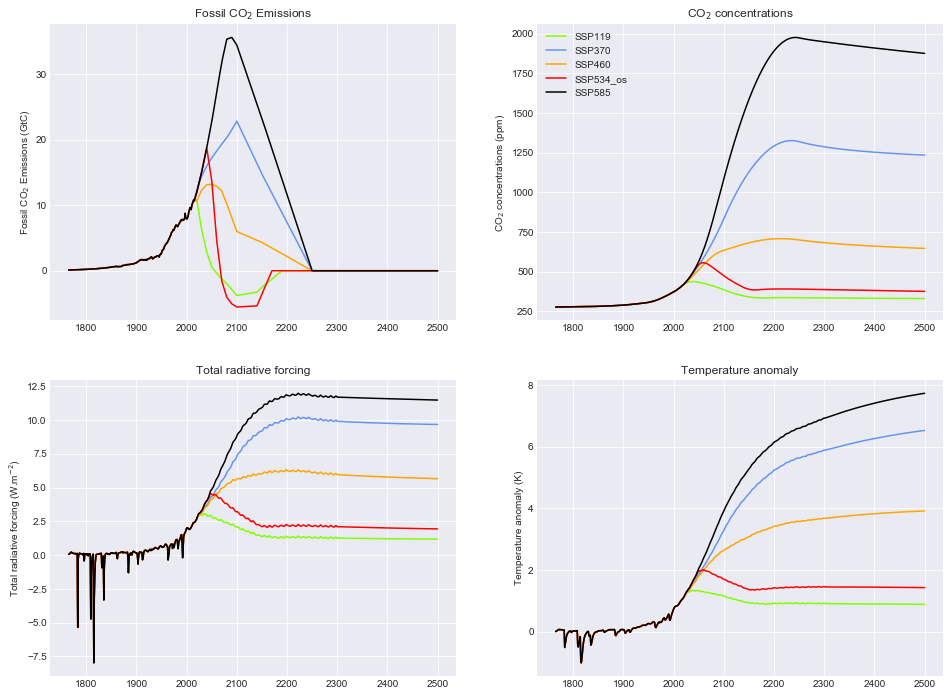

In [73]:
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16,12)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


C119, F119, T119, _ = fair.forward3.fair_scm(emissions=emissions_119, lam=1.35, eps=1.28, gam=0.963)
ax1.plot(SSP_585.index, emissions_119[:,1], color='chartreuse', label='SSP119')
ax2.plot(SSP_585.index, C119[:,0], color='chartreuse', label='SSP119')
ax3.plot(SSP_585.index, np.sum(F119, axis=1), color='chartreuse')
ax4.plot(SSP_585.index, T119, color='chartreuse')

C370, F370, T370, _ = fair.forward3.fair_scm(emissions=emissions_370, lam=1.35, eps=1.28, gam=0.963)
ax1.plot(SSP_585.index, emissions_370[:,1], color='cornflowerblue', label='SSP370')
ax2.plot(SSP_585.index, C370[:,0], color='cornflowerblue', label='SSP370')
ax3.plot(SSP_585.index, np.sum(F370, axis=1), color='cornflowerblue')
ax4.plot(SSP_585.index, T370, color='cornflowerblue')

C460, F460, T460, _ = fair.forward3.fair_scm(emissions=emissions_460, lam=1.35, eps=1.28, gam=0.963)
ax1.plot(SSP_585.index, emissions_460[:,1], color='orange', label='SSP460')
ax2.plot(SSP_585.index, C460[:,0], color='orange', label='SSP460')
ax3.plot(SSP_585.index, np.sum(F460, axis=1), color='orange')
ax4.plot(SSP_585.index, T460, color='orange')

C534, F534, T534, _ = fair.forward3.fair_scm(emissions=emissions_534_os, lam=1.35, eps=1.28, gam=0.963)
ax1.plot(SSP_585.index, emissions_534_os[:,1], color='red', label='SSP534_os')
ax2.plot(SSP_585.index, C534[:,0], color='red', label='SSP534_os')
ax3.plot(SSP_585.index, np.sum(F534, axis=1), color='red')
ax4.plot(SSP_585.index, T534, color='red')

C585, F585, T585, _ = fair.forward3.fair_scm(emissions=emissions_585, lam=1.35, eps=1.28, gam=0.963)
ax1.plot(SSP_585.index, emissions_585[:,1], color='black', label='SSP585')
ax2.plot(SSP_585.index, C585[:,0], color='black', label='SSP585')
ax3.plot(SSP_585.index, np.sum(F585, axis=1), color='black')
ax4.plot(SSP_585.index, T585, color='black')
plt.legend()

ax2.legend()

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)')

ax1.set_title('Fossil CO$_2$ Emissions')
ax2.set_title('CO$_2$ concentrations')
ax3.set_title('Total radiative forcing')
ax4.set_title('Temperature anomaly')



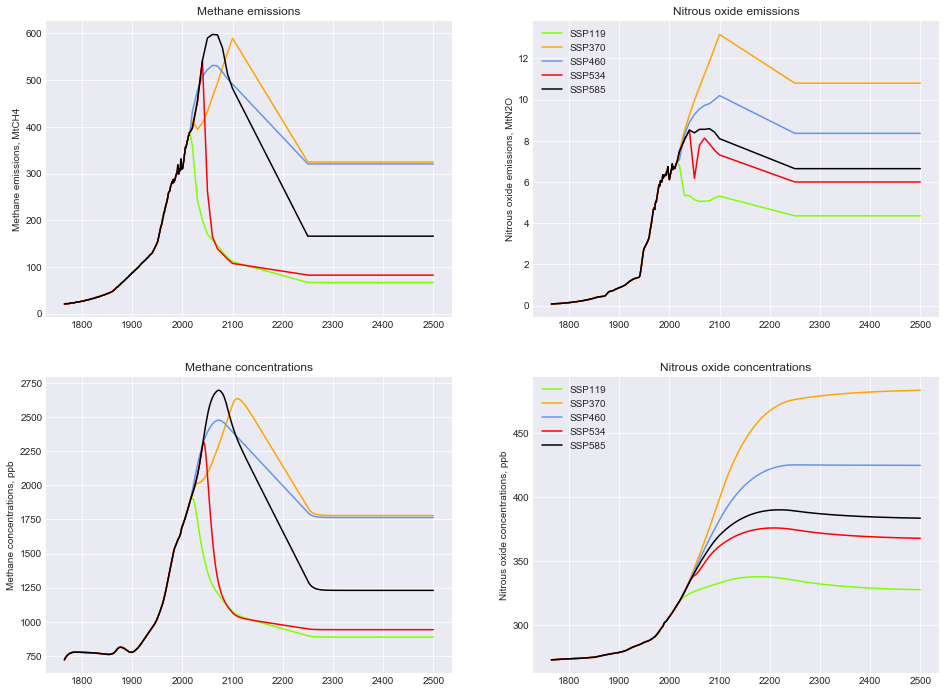

In [77]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(SSP_585.index, emissions_119[:,3], color='chartreuse')
ax1.plot(SSP_585.index, emissions_370[:,3], color='orange')
ax1.plot(SSP_585.index, emissions_460[:,3], color='cornflowerblue')
ax1.plot(SSP_585.index, emissions_534_os[:,3], color='red')
ax1.plot(SSP_585.index, emissions_585[:,3], color='black')
ax1.set_ylabel('Methane emissions, MtCH4')
ax1.set_title('Methane emissions')

ax2.plot(SSP_585.index, emissions_119[:,4], color='chartreuse', label='SSP119')
ax2.plot(SSP_585.index, emissions_370[:,4], color='orange', label='SSP370')
ax2.plot(SSP_585.index, emissions_460[:,4], color='cornflowerblue', label='SSP460')
ax2.plot(SSP_585.index, emissions_534_os[:,4], color='red', label='SSP534')
ax2.plot(SSP_585.index, emissions_585[:,4], color='black', label='SSP585')
ax2.set_ylabel('Nitrous oxide emissions, MtN2O')
ax2.set_title('Nitrous oxide emissions')
ax2.legend()

ax3.plot(SSP_585.index, C119[:,1], color='chartreuse', label='SSP119')
ax3.plot(SSP_585.index, C370[:,1], color='orange', label='SSP370')
ax3.plot(SSP_585.index, C460[:,1], color='cornflowerblue', label='SSP460')
ax3.plot(SSP_585.index, C534[:,1], color='red', label='SSP534')
ax3.plot(SSP_585.index, C585[:,1], color='black', label='SSP585')
ax3.set_ylabel('Methane concentrations, ppb')
ax3.set_title('Methane concentrations')

ax4.plot(SSP_585.index, C119[:,2], color='chartreuse', label='SSP119')
ax4.plot(SSP_585.index, C370[:,2], color='orange', label='SSP370')
ax4.plot(SSP_585.index, C460[:,2], color='cornflowerblue', label='SSP460')
ax4.plot(SSP_585.index, C534[:,2], color='red', label='SSP534')
ax4.plot(SSP_585.index, C585[:,2], color='black', label='SSP585')
ax4.set_title('Nitrous oxide concentrations')
ax4.set_ylabel('Nitrous oxide concentrations, ppb')

ax4.legend()


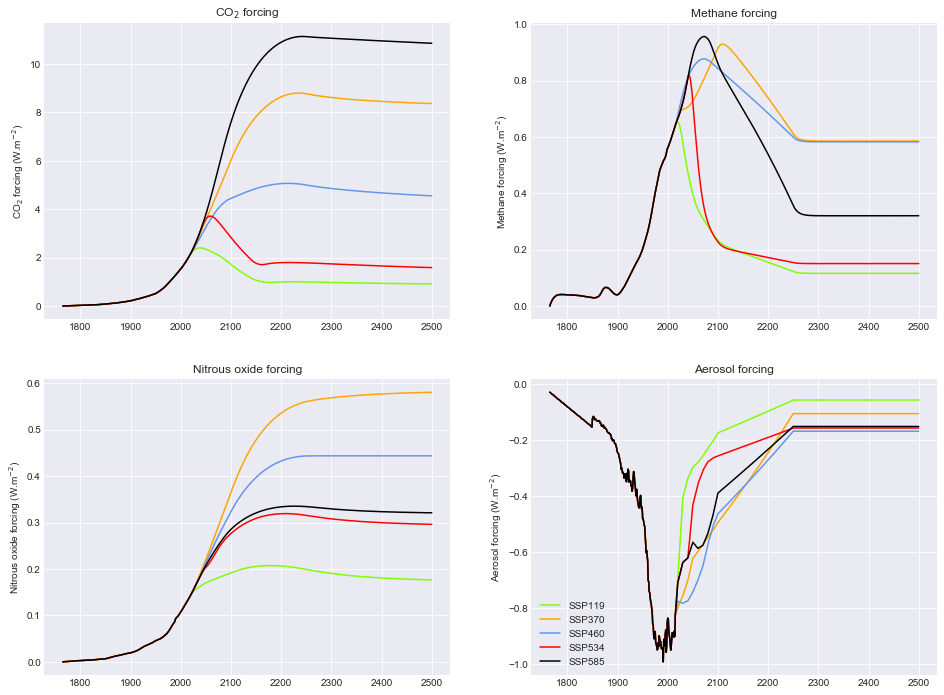

In [75]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.plot(SSP_585.index, F119[:,0], color='chartreuse', label='SSP119')
ax1.plot(SSP_585.index, F370[:,0], color='orange', label='SSP370')
ax1.plot(SSP_585.index, F460[:,0], color='cornflowerblue', label='SSP460')
ax1.plot(SSP_585.index, F534[:,0], color='red', label='SSP534')
ax1.plot(SSP_585.index, F585[:,0], color='black', label='SSP585')
ax1.set_ylabel('CO$_2$ forcing (W.m$^{-2}$)')
ax1.set_title('CO$_2$ forcing')

ax2.plot(SSP_585.index, F119[:,1], color='chartreuse', label='SSP119')
ax2.plot(SSP_585.index, F370[:,1], color='orange', label='SSP370')
ax2.plot(SSP_585.index, F460[:,1], color='cornflowerblue', label='SSP460')
ax2.plot(SSP_585.index, F534[:,1], color='red', label='SSP534')
ax2.plot(SSP_585.index, F585[:,1], color='black', label='SSP585')
ax2.set_ylabel('Methane forcing (W.m$^{-2}$)')
ax2.set_title('Methane forcing')

ax3.plot(SSP_585.index, F119[:,2], color='chartreuse', label='SSP119')
ax3.plot(SSP_585.index, F370[:,2], color='orange', label='SSP370')
ax3.plot(SSP_585.index, F460[:,2], color='cornflowerblue', label='SSP460')
ax3.plot(SSP_585.index, F534[:,2], color='red', label='SSP534')
ax3.plot(SSP_585.index, F585[:,2], color='black', label='SSP585')
ax3.set_ylabel('Nitrous oxide forcing (W.m$^{-2}$)')
ax3.set_title('Nitrous oxide forcing')

ax4.plot(SSP_585.index, F119[:,8], color='chartreuse', label='SSP119')
ax4.plot(SSP_585.index, F370[:,8], color='orange', label='SSP370')
ax4.plot(SSP_585.index, F460[:,8], color='cornflowerblue', label='SSP460')
ax4.plot(SSP_585.index, F534[:,8], color='red', label='SSP534')
ax4.plot(SSP_585.index, F585[:,8], color='black', label='SSP585')
ax4.set_ylabel('Aerosol forcing (W.m$^{-2}$)')
ax4.set_title('Aerosol forcing')

plt.legend()